# Стоимость автомобиля

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!  

Целью проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

Источник данных: [https://www.kaggle.com/competitions/copy-of-used-cars-price-prediction-ds18](https://www.kaggle.com/competitions/copy-of-used-cars-price-prediction-ds18)

## 1. Подготовка данных

### 1.1. Импорт библиотек и модулей, загрузка данных

In [422]:
# Установка библиотек
#!pip3 install catboost
#!pip install shap
#!pip install association-metrics

In [423]:
# Импорт необходимых библиотек, модулей и т.д.
import pandas as pd
import numpy as np
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import f1_score, roc_auc_score, roc_curve
#from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import association_metrics as am
from catboost import CatBoostRegressor
from catboost import cv, Pool
import shap
#shap.initjs()

In [424]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [425]:
# Загрузка данных
df_train = pd.read_csv('C:/Users/svkb2/Desktop/Data Science/Workshop car cost/Data/train.csv')
df_test = pd.read_csv('C:/Users/svkb2/Desktop/Data Science/Workshop car cost/Data/test.csv')
# Присвоим таблицам имена:
df_train.name = 'Тренировочные данные'
df_test.name = 'Тестовые данные'

### 1.2. Первичное знакомство с данными

In [426]:
# Функция первичного знакомства с данными
def introduction(df):
    print('Название датафрейма:', df.name)
    print('_'*100)
    display(df.tail())
    print('\nОбщая информация')
    print('_'*100)
    display(df.info())
    print('\nХарактеристики распределения')
    print('_'*100)
    display(df.describe().T)
    display(df.describe(include = ['object']).T)
    print('\nКол-во дубликатов записей:', df.duplicated().sum())
    print('_'*100)

In [427]:
introduction(df_train)

Название датафрейма: Тренировочные данные
____________________________________________________________________________________________________


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,Tue Jan 20 2015 04:30:00 GMT-0800 (PST)
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
440233,2008,BMW,6 Series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST)
440234,2014,Ram,2500,SLT,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,Wed Jan 14 2015 02:05:00 GMT-0800 (PST)
440235,2013,Nissan,Rogue,SV,SUV,automatic,jn8as5mt9dw038107,il,3.5,27924.0,silver,gray,"ec sales,llc",14500,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)



Общая информация
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), in

None


Характеристики распределения
____________________________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
year,440236.0,2010.040101,3.977945,1982.0,2007.0,2012.0,2013.0,2015.0
condition,430831.0,3.425077,0.949973,1.0,2.7,3.6,4.2,5.0
odometer,440167.0,68344.421604,53542.203908,1.0,28258.0,52098.0,99272.0,999999.0
sellingprice,440236.0,13592.209588,9751.479098,1.0,6900.0,12100.0,18200.0,230000.0


,count,unique,top,freq
make,432193,92,Ford,73708
model,432113,959,Altima,15454
trim,431899,1922,Base,43853
body,429843,85,Sedan,157639
transmission,388775,2,automatic,375061
vin,440236,440236,2fmdk3jc4bba41556,1
state,440236,38,fl,65618
color,439650,20,black,87115
interior,439650,17,black,192442
seller,440236,13025,nissan-infiniti lt,15823



Кол-во дубликатов записей: 0
____________________________________________________________________________________________________


In [428]:
introduction(df_test)

Название датафрейма: Тестовые данные
____________________________________________________________________________________________________


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
110053,2011,Jeep,Wrangler,Sport,SUV,automatic,1j4aa2d17bl584330,ca,3.8,66085.0,orange,black,dtg operations inc,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)
110054,2014,Lexus,IS 250,Base,sedan,automatic,jthbf1d23e5007526,fl,4.8,17588.0,gray,black,lexus financial services,Mon Jun 15 2015 11:00:00 GMT-0700 (PDT)
110055,2004,Nissan,Maxima,3.5 SL,Sedan,automatic,1n4ba41e54c831950,va,2.9,124036.0,silver,gray,shirlie slack mitsubishi,Thu Feb 05 2015 01:35:00 GMT-0800 (PST)
110056,2013,Nissan,370Z,Base,coupe,manual,jn1az4eh3dm382431,tx,2.2,27169.0,—,black,nissan motor acceptance corporation,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)
110057,2012,Chevrolet,Camaro,LS,Coupe,NaN,2g1fa1e32c9193058,pa,3.7,40399.0,blue,black,ingersoll auto of danbury,Fri Jan 09 2015 09:00:00 GMT-0800 (PST)



Общая информация
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


None


Характеристики распределения
____________________________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
year,110058.0,2010.060005,3.960190,1982.0,2007.0,2012.0,2013.0,2015.0
condition,107679.0,3.423222,0.951301,1.0,2.7,3.6,4.2,5.0
odometer,110039.0,68074.331601,53520.988173,1.0,28313.5,51922.0,98852.5,999999.0


,count,unique,top,freq
make,107997,85,Ford,18383
model,107979,824,Altima,3736
trim,107944,1496,Base,11007
body,107464,77,Sedan,39255
transmission,97047,2,automatic,93584
vin,110058,110058,1g6dp567450124779,1
state,110058,38,fl,16295
color,109900,20,black,22006
interior,109900,17,black,48176
seller,110058,7623,"ford motor credit company,llc",3858



Кол-во дубликатов записей: 0
____________________________________________________________________________________________________


**Для удобства предобработки данных объединим тренировочные и тестовые данные** 

In [429]:
df = pd.concat([df_train, df_test], sort=False, axis=0)
df.name = 'Объединенные данные'
introduction(df)

Название датафрейма: Объединенные данные
____________________________________________________________________________________________________


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
110053,2011,Jeep,Wrangler,Sport,SUV,automatic,1j4aa2d17bl584330,ca,3.8,66085.0,orange,black,dtg operations inc,NaN,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)
110054,2014,Lexus,IS 250,Base,sedan,automatic,jthbf1d23e5007526,fl,4.8,17588.0,gray,black,lexus financial services,NaN,Mon Jun 15 2015 11:00:00 GMT-0700 (PDT)
110055,2004,Nissan,Maxima,3.5 SL,Sedan,automatic,1n4ba41e54c831950,va,2.9,124036.0,silver,gray,shirlie slack mitsubishi,NaN,Thu Feb 05 2015 01:35:00 GMT-0800 (PST)
110056,2013,Nissan,370Z,Base,coupe,manual,jn1az4eh3dm382431,tx,2.2,27169.0,—,black,nissan motor acceptance corporation,NaN,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)
110057,2012,Chevrolet,Camaro,LS,Coupe,NaN,2g1fa1e32c9193058,pa,3.7,40399.0,blue,black,ingersoll auto of danbury,NaN,Fri Jan 09 2015 09:00:00 GMT-0800 (PST)



Общая информация
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 550294 entries, 0 to 110057
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550294 non-null  int64  
 1   make          540190 non-null  object 
 2   model         540092 non-null  object 
 3   trim          539843 non-null  object 
 4   body          537307 non-null  object 
 5   transmission  485822 non-null  object 
 6   vin           550294 non-null  object 
 7   state         550294 non-null  object 
 8   condition     538510 non-null  float64
 9   odometer      550206 non-null  float64
 10  color         549550 non-null  object 
 11  interior      549550 non-null  object 
 12  seller        550294 non-null  object 
 13  sellingprice  440236 non-null  float64
 14  saledate      550294 non-null  object 
dtypes: float64(3), in

None


Характеристики распределения
____________________________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
year,550294.0,2010.044082,3.974405,1982.0,2007.0,2012.0,2013.0,2015.0
condition,538510.0,3.424706,0.950238,1.0,2.7,3.6,4.2,5.0
odometer,550206.0,68290.404683,53538.021892,1.0,28267.0,52061.0,99197.0,999999.0
sellingprice,440236.0,13592.209588,9751.479098,1.0,6900.0,12100.0,18200.0,230000.0


,count,unique,top,freq
make,540190,96,Ford,92091
model,540092,973,Altima,19190
trim,539843,1975,Base,54860
body,537307,85,Sedan,196894
transmission,485822,2,automatic,468645
vin,550294,550294,2fmdk3jc4bba41556,1
state,550294,38,fl,81913
color,549550,20,black,109121
interior,549550,17,black,240618
seller,550294,14093,nissan-infiniti lt,19675



Кол-во дубликатов записей: 0
____________________________________________________________________________________________________


## 2. Предобработка данных

### 2.1. Обработка категориальных переменных

#### 2.1.1. Колонка `make`

In [430]:
#cat_features = list(df.select_dtypes(include='object').columns)
#df[cat_features] = df[cat_features].fillna('other')
# Присвоим пропускам значение 'other'
df['make'] = df['make'].fillna('other')
# Сделаем все буквы в названиях строчными
df['make'] = df['make'].str.lower()
print('Кол-во уникальных значений на этом шаге:', df['make'].nunique(),'\n')
# Выведем отсортированные уникальные значения, это поможет увидеть неявные дубликаты
a = df['make'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 67 

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford tk', 'ford truck', 'geo', 'gmc', 'gmc truck', 'honda', 'hummer', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'other', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw']


В колонке остаются неявные дубликаты, имеет смысл их обработать

In [431]:
# Словарь для унификации названий производителей
correct_make = {'dodge tk':'dodge', 'ford truck':'ford', 'gmc truck':'gmc', 'landrover':'land rover', 'mazda tk':'mazda', 'mercedes-benz':'mercedes',
                'mercedes-b':'mercedes', 'vw':'volkswagen', 'chev truck': 'chevrolet', 'ford tk': 'ford', 'hyundai tk': 'hyundai'}
# Функция, которая унифицирует название производителя
def universal_make (make):
    try:
        for i in list(correct_make.keys()):
            make = make.replace(i, correct_make[i])
        return make
    except:
        return make
# Применим функцию к столбцу 'make'
df['make'] = df['make'].apply(universal_make)
print('Кол-во уникальных значений на этом шаге:', df['make'].nunique(),'\n')
a = df['make'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 56 

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'other', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']


#### 2.1.2. Колонка `model`

In [432]:
# Присвоим пропускам значение 'other'
df['model'] = df['model'].fillna('other')
# Сделаем все буквы в названиях строчными
df['model'] = df['model'].str.lower()
print('Кол-во уникальных значений на этом шаге:', df['model'].nunique(),'\n')
# Выведем отсортированные уникальные значения, возможно это поможет увидеть неявные дубликаты
a = df.query('make == "mercedes"')['model'].unique()
#a = df['model'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 852 

['190-class', '300-class', '300e', '400-class', '420-class', '420sel', '500-class', 'b-class electric drive', 'b200', 'c-class', 'c230', 'c230wz', 'c240s', 'c240w', 'cl-class', 'cl55', 'cla-class', 'clk-class', 'cls-class', 'e-class', 'e300dt', 'g-class', 'g500', 'g55', 'gl-class', 'gla-class', 'glk-class', 'm-class', 'ml55 amg', 'r-class', 's-class', 's55', 'sl-class', 'sl55', 'slk-class', 'sls amg', 'sls amg gt', 'sprinter']


Скорее всего, в колонке остались неявные дубликаты. Но количество записей слишком велико, чтобы обработать их вручную. Оставим как есть.

#### 2.1.3. Колонка `trim`

In [433]:
# Присвоим пропускам значение 'other'
df['trim'] = df['trim'].fillna('other')
# Сделаем все буквы в названиях строчными
df['trim'] = df['trim'].str.lower()
print('Кол-во уникальных значений на этом шаге:', df['trim'].nunique(),'\n')
# Выведем отсортированные уникальные значения, возможно это поможет увидеть неявные дубликаты
a = df.query('make == "mercedes"')['trim'].unique()
#a = df['model'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 1902 

['190e 2.3', '2500 144 wb cargo', '2500 144 wb crew', '2500 144 wb passenger', '2500 170 wb cargo', '2500 170 wb passenger', '300e', '300e 2.8', '300se', '300sl', '3500', '3500 170 wb cargo', '400sel', '420sel', '500sl', 'amg', 'base', 'c220', 'c230', 'c230 kompressor', 'c230 sport', 'c240', 'c240 4matic', 'c240 luxury', 'c240 luxury 4matic', 'c250', 'c250 sport', 'c280', 'c280 luxury', 'c280 luxury 4matic', 'c300', 'c300 luxury', 'c300 luxury 4matic', 'c300 sport', 'c300 sport 4matic', 'c32 amg', 'c320', 'c320 4matic', 'c320 luxury 4matic', 'c320 sport', 'c350', 'c350 4matic', 'c350 luxury', 'c350 luxury 4matic', 'c350 sport', 'c400 sport 4matic', 'c55 amg', 'c63 amg', 'cl500', 'cl55 amg', 'cl550', 'cl550 4matic', 'cl600', 'cl63 amg', 'cl65 amg', 'cla250', 'cla250 4matic', 'cla45 amg', 'clk320', 'clk350', 'clk430', 'clk500', 'clk55 amg', 'clk550', 'clk63 amg', 'cls500', 'cls55 amg', 'cls550', 'cls550 4matic', 'cls63 amg', 'cls63 amg 4mat

#### 2.1.4. Колонка `body`

In [434]:
# Присвоим пропускам значение 'other'
df['body'] = df['body'].fillna('other')
# Сделаем все буквы в названиях строчными
df['body'] = df['body'].str.lower()
print('Кол-во уникальных значений на этом шаге:', df['body'].nunique(),'\n')
# Выведем отсортированные уникальные значения, это поможет увидеть неявные дубликаты
a = df['body'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 46 

['access cab', 'beetle convertible', 'cab plus', 'cab plus 4', 'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon', 'double cab', 'e-series van', 'elantra coupe', 'extended cab', 'g convertible', 'g coupe', 'g sedan', 'g37 convertible', 'g37 coupe', 'genesis coupe', 'granturismo convertible', 'hatchback', 'king cab', 'koup', 'mega cab', 'minivan', 'other', 'promaster cargo van', 'q60 convertible', 'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'regular-cab', 'sedan', 'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon', 'van', 'wagon', 'xtracab']


#### 2.1.5. Колонка `transmission`

In [435]:
# Присвоим пропускам значение 'other'
df['transmission'] = df['transmission'].fillna('other')
df['transmission'].unique()

array(['automatic', 'other', 'manual'], dtype=object)

#### 2.1.6. Колонка `color`

In [436]:
a = df['color'].unique()

In [437]:
# Чтобы не плодить лишние значения, присвоим пропускам значение '—'
df['color'] = df['color'].fillna('—')
print('Кол-во уникальных значений на этом шаге:', df['color'].nunique(),'\n')
# Выведем отсортированные уникальные значения, это поможет увидеть неявные дубликаты
a = df['color'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 20 

['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow', '—']


#### 2.1.7. Колонка `interior`

In [438]:
df['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'off-white', nan,
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

In [439]:
# Чтобы не плодить лишние значения, присвоим пропускам значение '—'
df['interior'] = df['interior'].fillna('—')
print('Кол-во уникальных значений на этом шаге:', df['interior'].nunique(),'\n')
# Выведем отсортированные уникальные значения, это поможет увидеть неявные дубликаты
a = df['interior'].unique()
print(sorted(a))

Кол-во уникальных значений на этом шаге: 17 

['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray', 'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan', 'white', 'yellow', '—']


### 2.2. Создание новых признаков

#### 2.2.1. Из колонки `saledate` выделим и добавим в данные год и месяц продажи 

In [440]:
# Функция выделяет месяц продажи 
def parse_month (saledate):
    sale_month = saledate[4:7]
    return sale_month
# Функция выделяет год продажи 
def parse_year (saledate):
    sale_year = saledate[11:15]
    return sale_year
# Чтобы создать колонки с месяцем и годом продажи, применим функции к столбцу 'saledate'
df['sale_month'] = df['saledate'].apply(parse_month)
df['sale_year'] = df['saledate'].apply(parse_year).astype('int64')
display(df.head())
df['sale_year'].dtype

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_month,sale_year
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Jun,2015
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),Feb,2015
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100.0,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT),Jun,2015
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300.0,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),Jun,2015
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300.0,Tue Feb 03 2015 04:00:00 GMT-0800 (PST),Feb,2015


dtype('int64')

В дальнейшем для обучения модели колонку `saledate` использовать не целесообразно.

#### 2.2.2. Рассчитаем возраст автомобиля на момент продажи и добавим соответствующий признак в данные

In [441]:
# Добавим в данные колонку 'car_age' с возрастом автомобиля на дату продажи
df['car_age'] = df['sale_year'] - df['year']

In [442]:
a = df['car_age'].unique()
print(sorted(a))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [443]:
# Возраст автомобиля на момент продажи не может быть отрицательным
# Предположим, что это были продажи еще не выпущенных автомобилей
# Тогда это не ошибка, а отдельный сегмент
# Чтобы не сбивать модель, избавимся от отрицательного возраста, добавив всем 1 
df['car_age'] = df['car_age'] + 1

In [444]:
a = df['car_age'].unique()
print(sorted(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


#### 2.2.3 Итоги создания новых признаков

Теперь колонку `saledate` следует исключить для моделирования и рассмотреть целесообразновть использования признаков `sale_month`, `sale_year` и `car_age`.

### 2.3. Обработка количественных признаков

#### 2.3.1. Колонка `condition`

In [445]:
# Заполним пропуски медианным значением состояния автомобиля, соответствующим возрасту возрасту автомобиля на дату продажи
for i in df['car_age'].unique():
    df.loc[(df['car_age'] == i) & (df['condition'].isna()), 'condition'] = \
    df.loc[(df['car_age'] == i), 'condition'].median()

#### 2.3.1. Колонка `odometer`

In [446]:
# Заполним пропуски медианным значением пробега автомобиля, соответствующим возрасту автомобиля на дату продажи
for i in df['car_age'].unique():
    df.loc[(df['car_age'] == i) & (df['odometer'].isna()), 'odometer'] = \
    df.loc[(df['car_age'] == i), 'odometer'].median()

### 2.4. Итоги предобработки данных

In [447]:
# Проверим, остались ли пропуски в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550294 entries, 0 to 110057
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550294 non-null  int64  
 1   make          550294 non-null  object 
 2   model         550294 non-null  object 
 3   trim          550294 non-null  object 
 4   body          550294 non-null  object 
 5   transmission  550294 non-null  object 
 6   vin           550294 non-null  object 
 7   state         550294 non-null  object 
 8   condition     550294 non-null  float64
 9   odometer      550294 non-null  float64
 10  color         550294 non-null  object 
 11  interior      550294 non-null  object 
 12  seller        550294 non-null  object 
 13  sellingprice  440236 non-null  float64
 14  saledate      550294 non-null  object 
 15  sale_month    550294 non-null  object 
 16  sale_year     550294 non-null  int64  
 17  car_age       550294 non-null  int64  
dtypes: f

В результате предобработки в данных частично устранены неявные дубликаты и заполнены пропуски:  
- Значением `other`  или `-` для категориальных данных
- Медианным значением параметра, соответствующим возрасту возрасту автомобиля на дату продажи

В данные добавлены новые признаки возраст атомобиля, год и месяц продажи.
Все преобразования сделаны для объединенных данных.

## 3. Анализ данных

### 3.1. Количественные признаки

<AxesSubplot:>

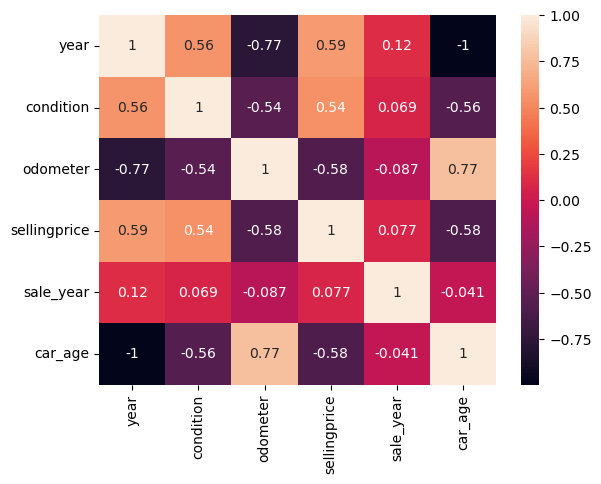

In [448]:
corr = df.corr()
sns.heatmap(corr, annot=True)

Коэффициент корреляции между годом выпуска автомобиля и его возрастом равен `-1` .  
Поэтому для модели правильно отобрать из них один - `car-age` .  
Корреляция между `sale_year` и целевым признаком `sellingprice` отсутствует, поэтому `sale_year` целесообразно удалить из списка параметров для обучения модели.

### 3.2. Категориальные признаки

#### 3.2.1. Аналог корреляции между категориальными признаками

In [449]:
# Список колонок, которые передам модели для категоризации
cat_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 'sale_month']
df_cat = df[cat_features]

In [450]:
DC = df_cat.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(DC) 
cramersv.fit()

,make,model,trim,body,transmission,state,color,interior,seller,sale_month
make,1.000000,0.980680,0.723470,0.247575,0.159759,0.077626,0.086134,0.107860,0.474175,0.039631
model,0.980680,1.000000,0.510441,0.841672,0.308436,0.114320,0.146302,0.180662,0.264395,0.078685
trim,0.723470,0.510441,1.000000,0.573287,0.287942,0.124597,0.135748,0.207865,0.241027,0.093409
body,0.247575,0.841672,0.573287,1.000000,0.168806,0.049013,0.072357,0.074281,0.275908,0.021920
transmission,0.159759,0.308436,0.287942,0.168806,1.000000,0.377917,0.062246,0.065248,0.387027,0.031428
state,0.077626,0.114320,0.124597,0.049013,0.377917,1.000000,0.066054,0.063094,0.676261,0.083385
color,0.086134,0.146302,0.135748,0.072357,0.062246,0.066054,1.000000,0.093187,0.223390,0.017406
interior,0.107860,0.180662,0.207865,0.074281,0.065248,0.063094,0.093187,1.000000,0.257887,0.065126
seller,0.474175,0.264395,0.241027,0.275908,0.387027,0.676261,0.223390,0.257887,1.000000,0.286119
sale_month,0.039631,0.078685,0.093409,0.021920,0.031428,0.083385,0.017406,0.065126,0.286119,1.000000


#### 3.2.2. Оценка влияния категориальных признаков на целевой признак `sellingprice`

Для каждого признака оценим, как меняется средняя цена автомобиля от значения категории.

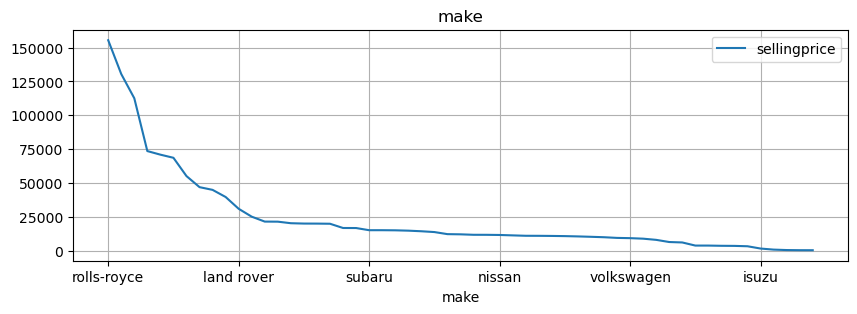

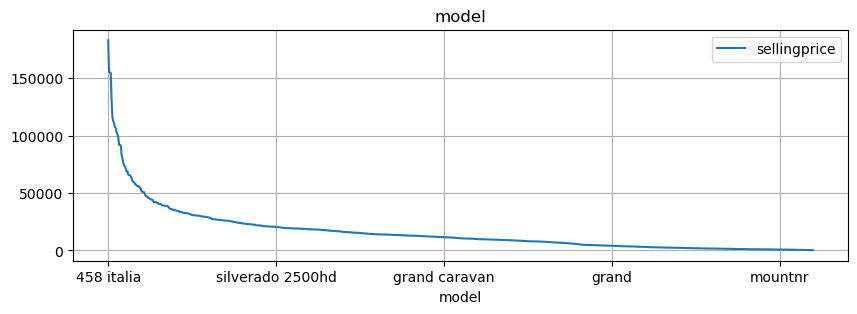

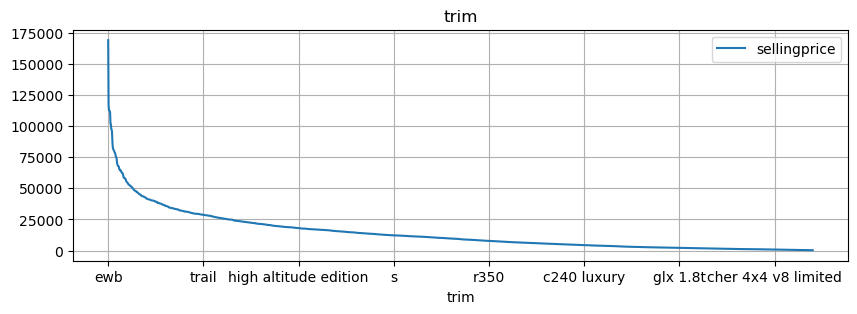

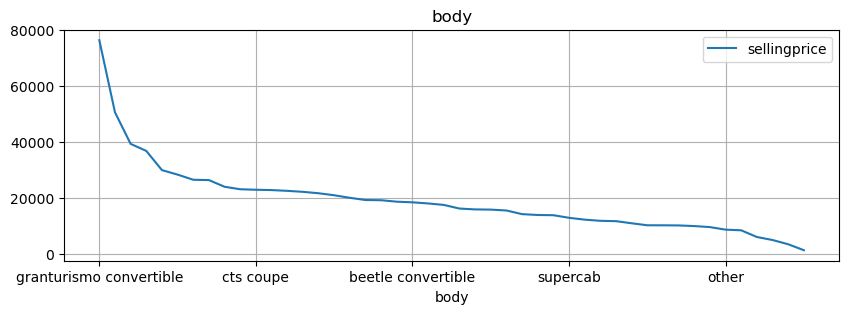

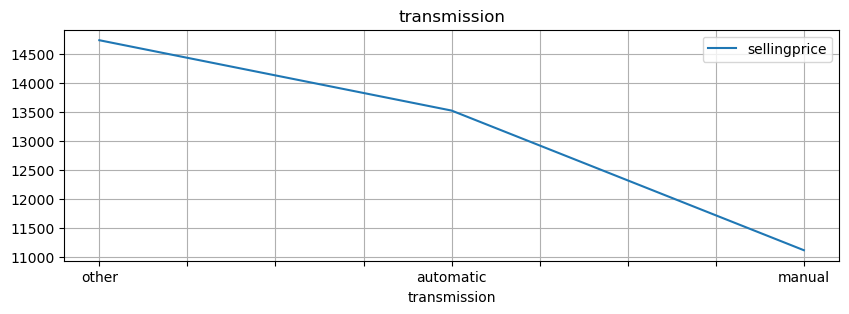

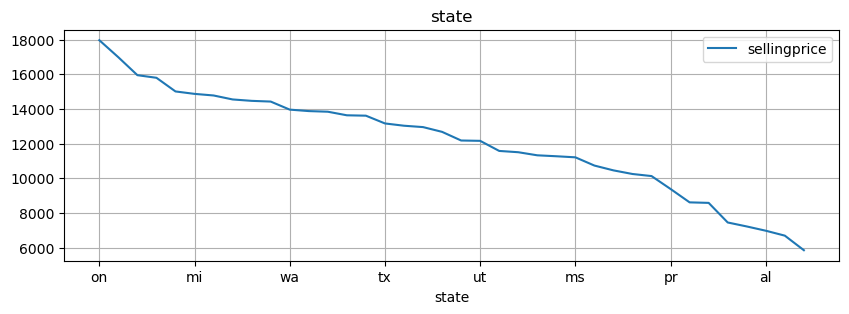

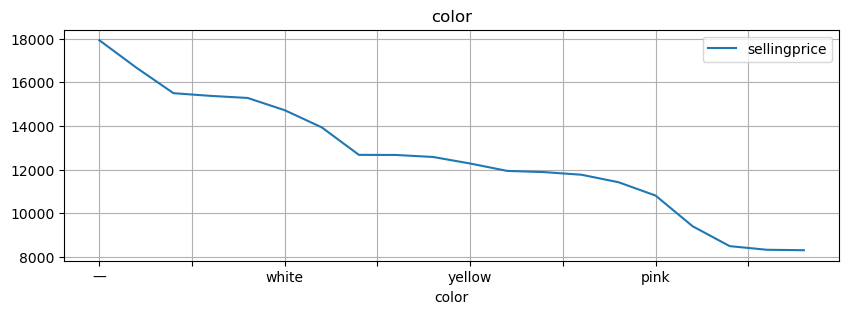

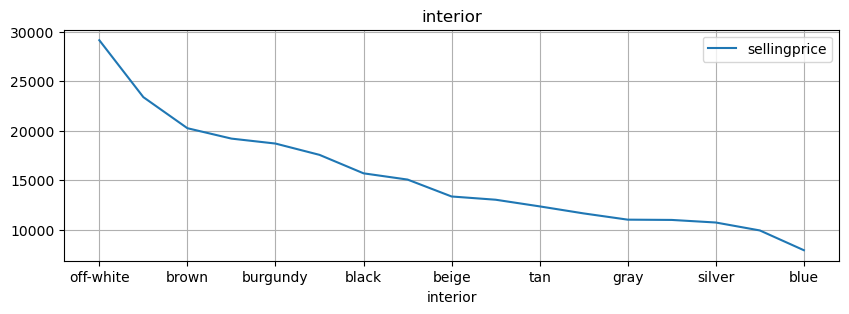

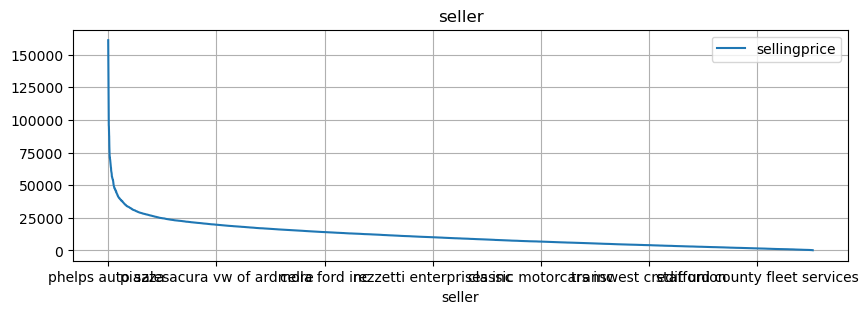

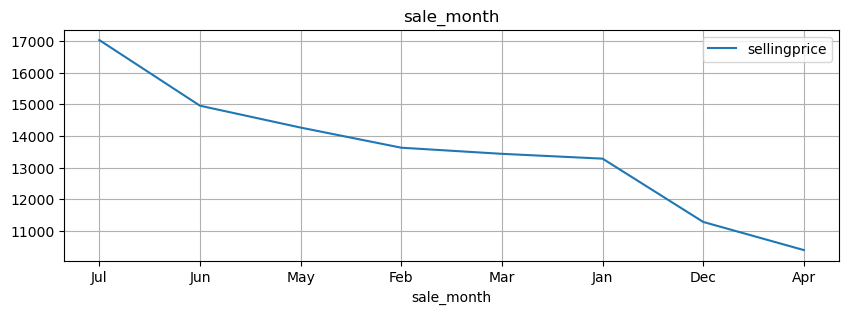

In [451]:
for i in cat_features:
    if df[i].dtype == 'object':
        df2 = df.pivot_table(index=i, values='sellingprice', aggfunc = 'mean')
        df2 = df2.sort_values('sellingprice', ascending=False)
        df2.plot(title=i, grid=True, figsize=(10, 3)) 

#### 3.3.3. Итоги анализа категориальных признаков

Стоимость автомобиля зависит от значений рассмотренных категориальных признаков.  
Их целесообразно использовать в моделировании.

## 4. Подбор оптимальных параметров и обучение модели CatBoostRegressor

### 4.1. Подготовка данных для моделирования

In [452]:
# Данные для тестирования
df_new_test=df[df['sellingprice'].isna()]
df_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110058 entries, 0 to 110057
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   model         110058 non-null  object 
 3   trim          110058 non-null  object 
 4   body          110058 non-null  object 
 5   transmission  110058 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     110058 non-null  float64
 9   odometer      110058 non-null  float64
 10  color         110058 non-null  object 
 11  interior      110058 non-null  object 
 12  seller        110058 non-null  object 
 13  sellingprice  0 non-null       float64
 14  saledate      110058 non-null  object 
 15  sale_month    110058 non-null  object 
 16  sale_year     110058 non-null  int64  
 17  car_age       110058 non-null  int64  
dtypes: f

In [453]:
# Тренировочные данные
df = df[df['sellingprice'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440236 entries, 0 to 440235
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          440236 non-null  object 
 2   model         440236 non-null  object 
 3   trim          440236 non-null  object 
 4   body          440236 non-null  object 
 5   transmission  440236 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     440236 non-null  float64
 9   odometer      440236 non-null  float64
 10  color         440236 non-null  object 
 11  interior      440236 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  float64
 14  saledate      440236 non-null  object 
 15  sale_month    440236 non-null  object 
 16  sale_year     440236 non-null  int64  
 17  car_age       440236 non-null  int64  
dtypes: f

In [454]:
# Список параметров для обучения модели
X = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'sale_month', 'car_age']

In [455]:
# Целевой параметр
y = ['sellingprice']

In [456]:
train_data = Pool(data=df[X], label=df[y], cat_features=cat_features)

### 4.2. Настройка оптимальных гиперпараметров модели

Ключевой гиперпараметр `learning_rate` .  
Поиск его оптимального значения производил вручную, используя встроенную в CatBoost кросвалидацию.  
Начальное значение `learning_rate` было установлено `0.15`.

In [457]:
params = {'cat_features': cat_features,
         'eval_metric': 'MAPE',
         'loss_function': 'RMSE',
         'learning_rate': 0.35,
         'random_seed': 12345,
         'verbose': 100}

In [458]:
cv_data = cv(params = params,
            pool = train_data,
            fold_count=5,
            shuffle = True,
            partition_random_seed = 0,
            stratified = False,
#            stratified = True,
            verbose = False,
            early_stopping_rounds = 200)

Training on fold [0/5]

bestTest = 0.172812029
bestIteration = 998

Training on fold [1/5]

bestTest = 0.171912862
bestIteration = 956

Training on fold [2/5]

bestTest = 0.1782897245
bestIteration = 769

Training on fold [3/5]

bestTest = 0.1742299118
bestIteration = 997

Training on fold [4/5]

bestTest = 0.2584017386
bestIteration = 997



In [459]:
cv_data

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,0.667947,0.025670,0.667847,0.006285,11857.150410,59.752300,11861.346885,11.782318
1,1,0.526479,0.023484,0.529703,0.034943,8799.748475,47.824500,8769.800354,57.175016
2,2,0.471631,0.036207,0.469957,0.030963,6958.883852,76.287232,6925.836304,63.964628
3,3,0.429719,0.030710,0.435148,0.018491,5887.265707,45.828240,5838.873086,48.277467
4,4,0.414772,0.050495,0.417458,0.009587,5249.600968,42.259938,5214.730309,50.333953
...,...,...,...,...,...,...,...,...,...
995,995,0.193723,0.037033,0.193948,0.008631,2306.108217,92.505041,2104.595408,13.543094
996,996,0.193718,0.037037,0.193945,0.008656,2305.921580,92.605171,2104.241851,13.683581
997,997,0.193680,0.037003,0.193907,0.008623,2305.637394,92.766624,2103.666305,13.623025
998,998,0.193694,0.037069,0.193938,0.008636,2305.379329,92.885212,2103.398279,13.770130


In [460]:
cv_data[cv_data['test-MAPE-mean'] == cv_data['test-MAPE-mean'].min()]

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
997,997,0.19368,0.037003,0.193907,0.008623,2305.637394,92.766624,2103.666305,13.623025


Оптимальный `learning_rate` - 0.35.  
При этом значении кол-во иттерации - 997. 

### 4.3. Обучение модели и предсказание стоимости автомобилей на тестовых данных 

In [461]:
model = CatBoostRegressor(**params)

In [462]:
model.fit(df[X], df[y])

0:	learn: 1.3506217	total: 280ms	remaining: 4m 39s
100:	learn: 0.2395756	total: 30s	remaining: 4m 26s
200:	learn: 0.2221976	total: 1m 2s	remaining: 4m 7s
300:	learn: 0.2138784	total: 1m 34s	remaining: 3m 39s
400:	learn: 0.2097501	total: 2m 6s	remaining: 3m 9s
500:	learn: 0.2046736	total: 2m 38s	remaining: 2m 38s
600:	learn: 0.1991150	total: 3m 11s	remaining: 2m 7s
700:	learn: 0.1977497	total: 3m 44s	remaining: 1m 35s
800:	learn: 0.1942598	total: 4m 17s	remaining: 1m 3s
900:	learn: 0.1939657	total: 4m 50s	remaining: 31.9s
999:	learn: 0.1935637	total: 5m 23s	remaining: 0us


In [463]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MAPE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntr

In [464]:
df_new_test['sellingprice'] = model.predict(df_new_test[X])

In [465]:
df_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110058 entries, 0 to 110057
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   model         110058 non-null  object 
 3   trim          110058 non-null  object 
 4   body          110058 non-null  object 
 5   transmission  110058 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     110058 non-null  float64
 9   odometer      110058 non-null  float64
 10  color         110058 non-null  object 
 11  interior      110058 non-null  object 
 12  seller        110058 non-null  object 
 13  sellingprice  110058 non-null  float64
 14  saledate      110058 non-null  object 
 15  sale_month    110058 non-null  object 
 16  sale_year     110058 non-null  int64  
 17  car_age       110058 non-null  int64  
dtypes: f

In [466]:
b=['vin', 'sellingprice']

In [467]:
df_new = df_new_test[b]

In [468]:
display(df_new.head())

,vin,sellingprice
0,1g6dp567450124779,4783.938816
1,1gtw7fca7e1902207,21478.604789
2,jn8az1mw6dw303497,20797.808263
3,2g1wf5e34d1160703,9697.789602
4,1n6aa0ec3dn301209,19656.491756


In [469]:
#df_new.to_csv (r'C:\Users\svkb2\Desktop\Data Science\Workshop car cost\Predict\sample_submission_3.csv', index= False )

## 5. Анализ важности признаков, влияющих на стоимость

### 5.1. Вычисленные значения функций

In [476]:
model.feature_importances_

array([19.98467182, 18.45439051,  7.11216385, 10.29583823,  0.39100884,
        0.91797746,  5.82184981, 16.7542105 ,  0.33751704,  1.40026464,
        2.87996106,  0.7538158 , 14.89633044])

In [ ]:
f_i = pd.DataFrame({'featture': X, 
                    'rate': [19.98467182, 18.45439051, 7.11216385, 10.29583823, 
                             0.39100884, 0.91797746, 5.82184981, 16.7542105 , 
                             0.33751704, 1.40026464, 2.87996106, 0.7538158 , 14.89633044]})

In [477]:
f_i.sort_values('rate', ascending=False)

,featture,rate
0,make,19.984672
1,model,18.454391
7,odometer,16.754210
12,car_age,14.896330
3,body,10.295838
2,trim,7.112164
6,condition,5.821850
10,seller,2.879961
9,interior,1.400265
5,state,0.917977


### 5.2. Распределение влияния каждой функции на выходные данные модели

In [470]:
explainer = shap.TreeExplainer(model)

In [471]:
shap_values = explainer.shap_values(train_data)

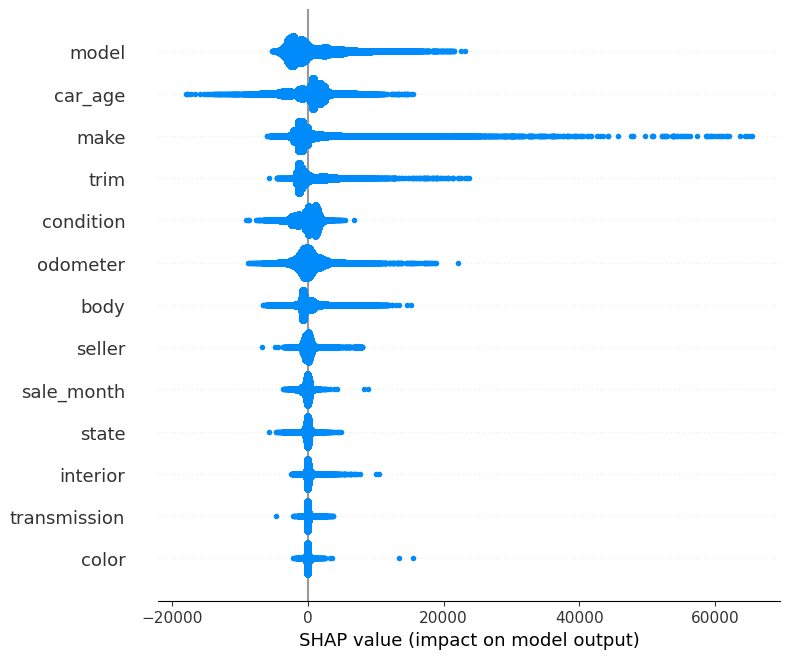

In [472]:
shap.summary_plot(shap_values, X)

## 6. Итоги

Целью проекта была разработка модели предсказания стоимости автомобиля на вторичном рынке.  
В качестве исходных данных использовалась информация о продажах (~440000) автомобилей с аукционов.  
В рамках проекта исходные данные были загружены и исследованы.  
На этапе предобработки данных были заполнены пропуски, устранены неявные дубликаты, выделены и созданы новые признаки.  
По результатам проведенного анализа были отобраны признаки для моделирования.  
Для моделирования была выбрана модель CatBoostRegressor.  
Были определены оптимальные гиперпараметры и обучена модель.  
По результатам моделирования был проведен анализ важности признаков, влияющих на стоимость.  
Наибольшее влияние на стоимость автомобиля оказывают модель и возраст автомобиля.  
Наименьшее - цвет кузова и тип коробки передач.  
С использованием модели были выполнены предсказания на тестовых данных.  
Предсказания загружены на платформу Kaggle.  
Показатель эффективности модели MAPE на тестовых данных составил 17.11283%.  
Это обеспечило модели позицию № 9 в рейтинге конкурса 'Предскажи стоимость автомобиля на вторичном рынке'.